In [37]:
#Fakharyar Khan and Colin Hwang
#ECE-475: Frequentist Machine Learning
#Project 4: Gradient Tree Boosting
#Professor Keene

import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.inspection import  PartialDependenceDisplay
from sklearn.model_selection import GridSearchCV

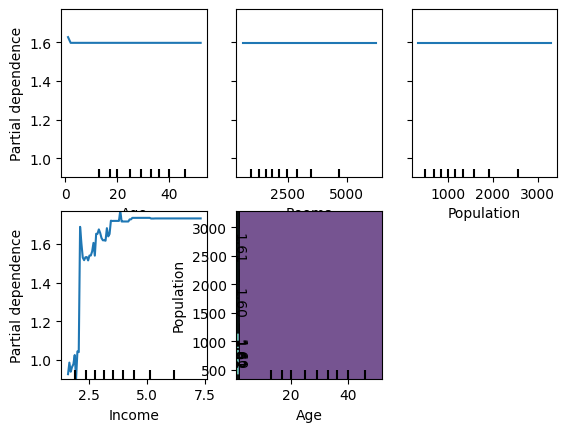

In [ ]:
def run(filename, target, dependence_feat_plot):
    df = pd.read_csv(filename)
    
    labels = df[target]
    features = df.drop(target, axis = 1)

    
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

    x_train = (x_train - x_train.mean())/x_train.std()
    x_test = (x_test - x_test.mean())/x_test.std()

    y_train = (y_train - y_train.mean())/y_train.std()

    y_test = (y_test - y_test.mean())/y_test.std()

    
    test_error = []
    train_error =[]

    for steps in [800]:
        xg_reg = xgb.XGBRegressor(objective ="reg:pseudohubererror",  learning_rate = 0.1,
                    max_leaves= 6,  n_estimators = steps) 

        xg_reg.fit(x_train, y_train)

        predictions = xg_reg.predict(x_test)

        test_error.append(mean_absolute_error(predictions, y_test))

        
        predictions = xg_reg.predict(x_train)

        train_error.append(mean_absolute_error(predictions, y_train))
    
  
    #plt.plot(range(0, 800, 100), train_error, label = "training error")

    #plt.plot(range(0, 800, 100), test_error, label = "testing error")

    #plt.legend(loc= "upper right")
    #plt.title("Training and Test Absolute Error")
    #plt.xlabel("Number of Iterations")
    #plt.ylabel("Absolute Error")

    #plt.show()



    feat_imp = xg_reg.feature_importances_
    feat_name = features.columns

    data = {"Features": feat_name, "Relative Importance": 100*feat_imp/max(feat_imp)}

    data = pd.DataFrame(data)

    data = data.sort_values(by = "Relative Importance", ascending = False)

    #plt.barh(data["Features"], data["Relative Importance"])
    #plt.title("Feature Importance")
    #plt.xlabel("Relative Importance")
    #plt.ylabel("Features")
    #plt.show()

    #"Longitude,Latitude,Age,Rooms,Bedrooms,Population,Households,Income,Housevalue"

   
    #PartialDependenceDisplay.from_estimator(xg_reg, features,  dependence_feat_plot[:-1])
    PartialDependenceDisplay.from_estimator(xg_reg, features, ["Age", "Rooms", "Population", "Income", ("Age", "Population")])
    

run("california_housing.csv", "Housevalue", [2,3,5,7, (2, 5)])

In [45]:
df = pd.read_csv("california_housing.csv")
labels = df["Housevalue"]
features = df.drop("Housevalue", axis = 1)

    
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()

y_train = (y_train - y_train.mean())/y_train.std()

y_test = (y_test - y_test.mean())/y_test.std()

params = { 'max_leaves': range(6, 10, 1),
           'learning_rate': np.arange(0.01, 0.5, 0.1),
           'n_estimators': range(500, 1000, 100)}

xgbr = xgb.XGBRegressor(objective ="reg:linear")

model = GridSearchCV(estimator = xgbr, param_grid = params,scoring='neg_mean_squared_error', verbose = 1)
model.fit(features, labels)

print("Best parameters:", model.best_params_)
print("Lowest RMSE: ", (-model.best_score_)**(1/2.0))


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best parameters: {'learning_rate': 0.01, 'max_leaves': 6, 'n_estimators': 500}
Lowest RMSE:  236864.1491114804


SUMMARY

CAL HOUSING:

Following the textbook's implementation, we used the following hyperparameters within our XGBoost implementation: a maximum of 6 terminal nodes, a learning rate of 0.1, a huber loss criterion, and a 80:20 train test split. It was also seen in figure 10.13 that they performed a total number of 800 iterations and plotted it against the average absolute error. Therefore, to match this, we created a for loop (iterating up to 1000) and setting the hyperparameter, n_estimators, to the the current index. 

After fitting our model onto our data within the various iterations and obtaining the average absolute error between our predictions and our train/test labels, we managed to get a close replication of figure 10.13 in the textbook, with our test error performing slightly better and our train error being roughly the same. We also found the importances of the predictor variables by using the feature importance method within XGBoost. Our replication of figure 10.14 in the textbook shows that median income is the most relevant predictor by far, with longitude, latitude and average occupancy having approximately equal importance values, which is about half of median income's importance. 


OUR OWN DATASET:

For our "complicated and messy dataset", we chose the Electrical Grid Stability Simulated dataset from UCI's ML repository (https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+) which contains 12 features and 10000 instances. While the dataset allows for either classification or regression, we decided to perform regression on it, following our implementation of the textbook's analysis. 

STRETCH GOAL 1: IMPLEMENT SIMPLE TREE ALGORITHM


STRETCH GOAL 2: IMPLEMENT ALGORITHM 10.3 USING TREE METHOD FROM STRETCH GOAL 1

TEMPORARY PROJECT INSTRUCTIONS:

For this assignment, you will learn how to use and tune a common gradient boosted tree package XGBoost:

https://xgboost.readthedocs.io/en/latest/

First, select one of the datasets from section 10.14 of the test(either California Housing or New Zealand Fish) and replicate the analysis, including the plots. You don't have to do the maps. 

Next, select a dataset of your choice and perform a similar analysis. You can perform classification or regresssion, your choice. This should be a more complicated, and if you want, messier, dataset than the ones we've looked at so far. Use the built-in functions that come with the xgboost package to tune the model and optimize your performance, and determine the feature importance.  As this assignment is more focused on using a library, I will be expecting a more thoughtful analysis of the results.

For some more details on XGBoost, you can have a look at : https://arxiv.org/pdf/1603.02754v3.pdf and https://medium.com/@gabrieltseng/gradient-boosting-and-xgboost-c306c1bcfaf5

If you wish to get your hands a bit dirty on tree-related algorithms, there are 2 stretch goals available as well.

Stretch goal #1, 3 points: Implement a basic tree algorithm for both regression and classification. It must work for several loss functions: mean-squared error, misclassification, Gini index, and cross-entropy. You do not have to implement any pruning, but the # of nodes should be a parameter. Select a dataset to test your algorithm on, and tune it using cross-validation to select the optimal # of nodes. Compare against a baseline.

Stretch goal #2, 3 points: Use a simple tree method, (like your tree from stretch goal #1) and implement algorithm 10.3. Select a dataset, tune your algorithm and compare it against a baseline